# Credit Card Clustering and Segmentation

# Business Context:
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset
summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a
customer level with 18 behavioral variables.

### Importing the libraries

In [1]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline


### Read Data

In [2]:
df = pd.read_csv('data_credit_card.csv', index_col= 0)



 ###  1. Data Preprocessing (15 points)
a. Check a few observations and get familiar with the data. (1 points)

In [3]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12


b. Check the size and info of the data set. (2 points)

In [4]:
print('Shape of the data set: ' + str(df.shape))
df.info()

Shape of the data set: (8950, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                    

In [5]:
df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

c. Check for missing values. Impute the missing values if there is any. (2 points)

In [6]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
#Replacing missing values with the individual column mean
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())

In [8]:
x = pd.DataFrame(df.isnull().sum())
x.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(x.index[x['Sum'] > 0])) )

Amount of rows with missing values: 0


d. Drop unnecessary columns. (2 points)<br>
<h5>We can drop the Cust_ID column as it is insignificant for our analysis


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


e. Check correlation among features and comment your findings. (3 points)

Text(0.5, 1.0, 'Correlation Matrix')

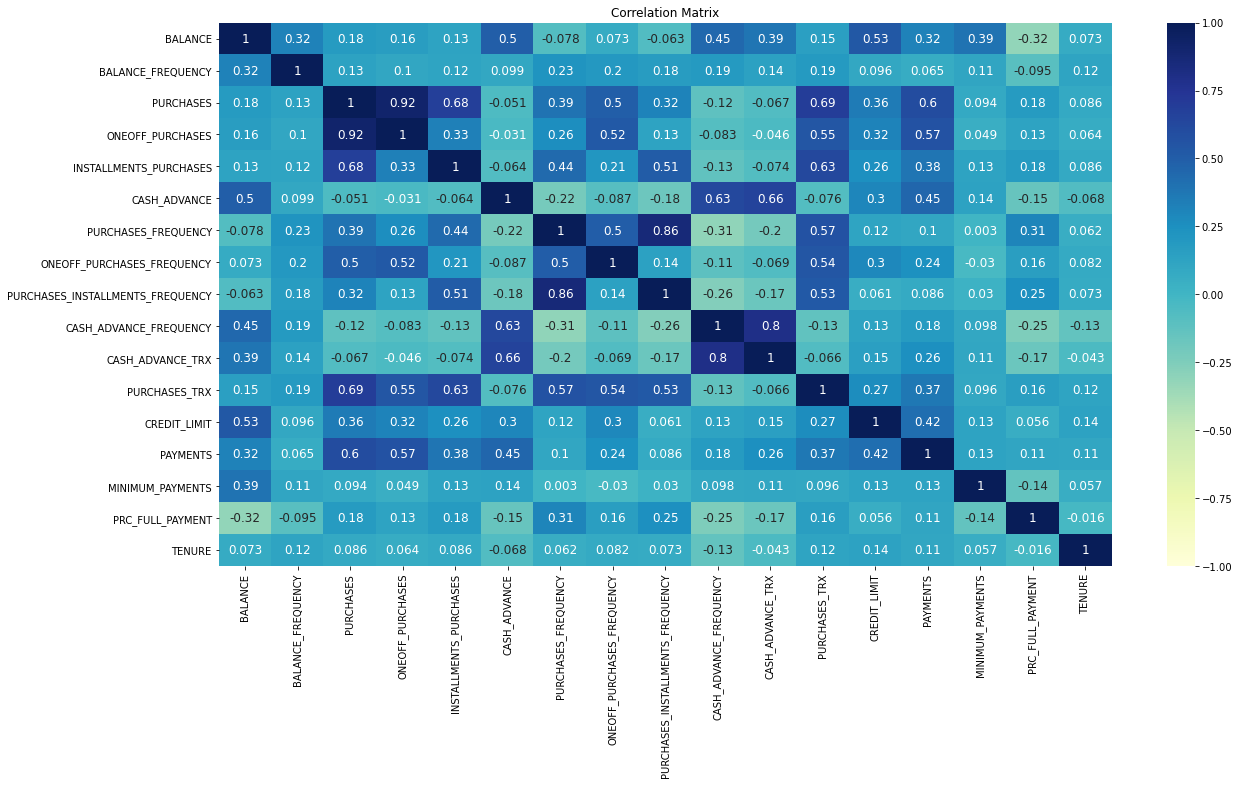

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

plt.title('Correlation Matrix')

<h5>Purchases and OneOff_Purchases are strongly correlated(92%), also purchase_frequency and purchase_installments_frequency are strongly correlated(86%).This can be used during our moel building

f. Check distribution of features and comment your findings. (3 points)

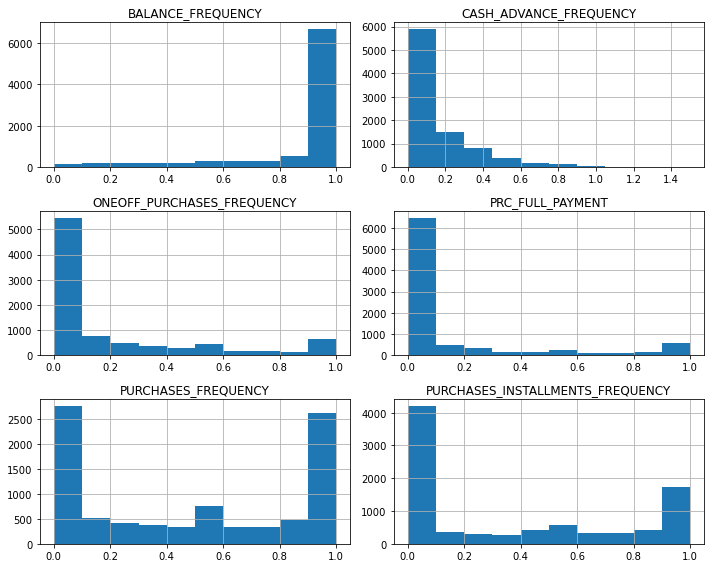

In [11]:
#Frequency variables in charts

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

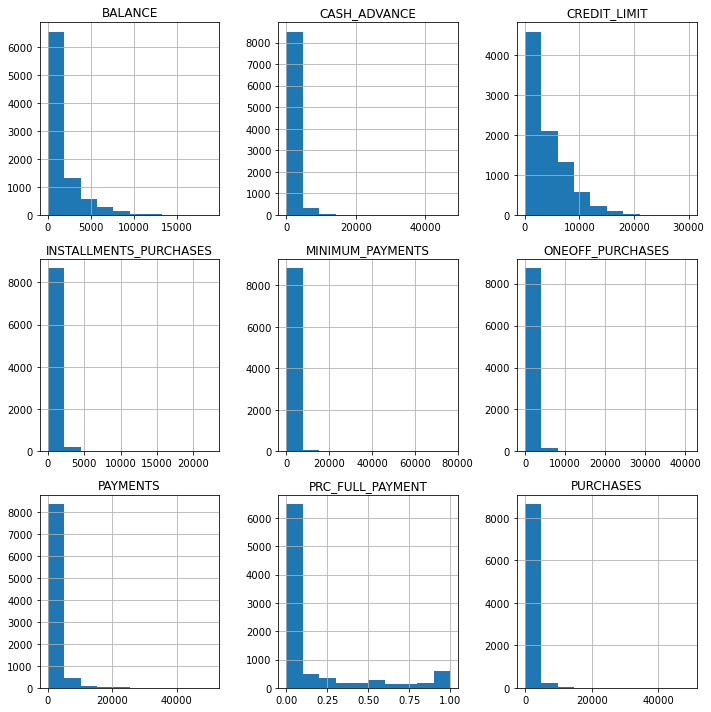

In [12]:
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

Text(0, 0.5, 'BALANCE')

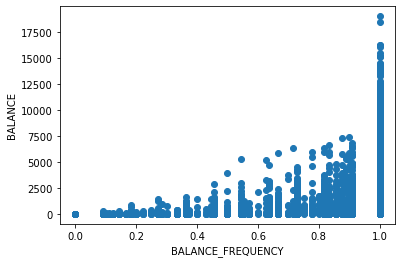

In [13]:

plt.scatter(df['BALANCE_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

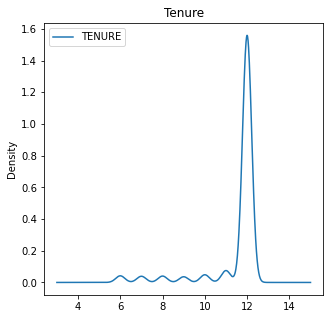

In [14]:
df[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')

In [20]:
graph_by_variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

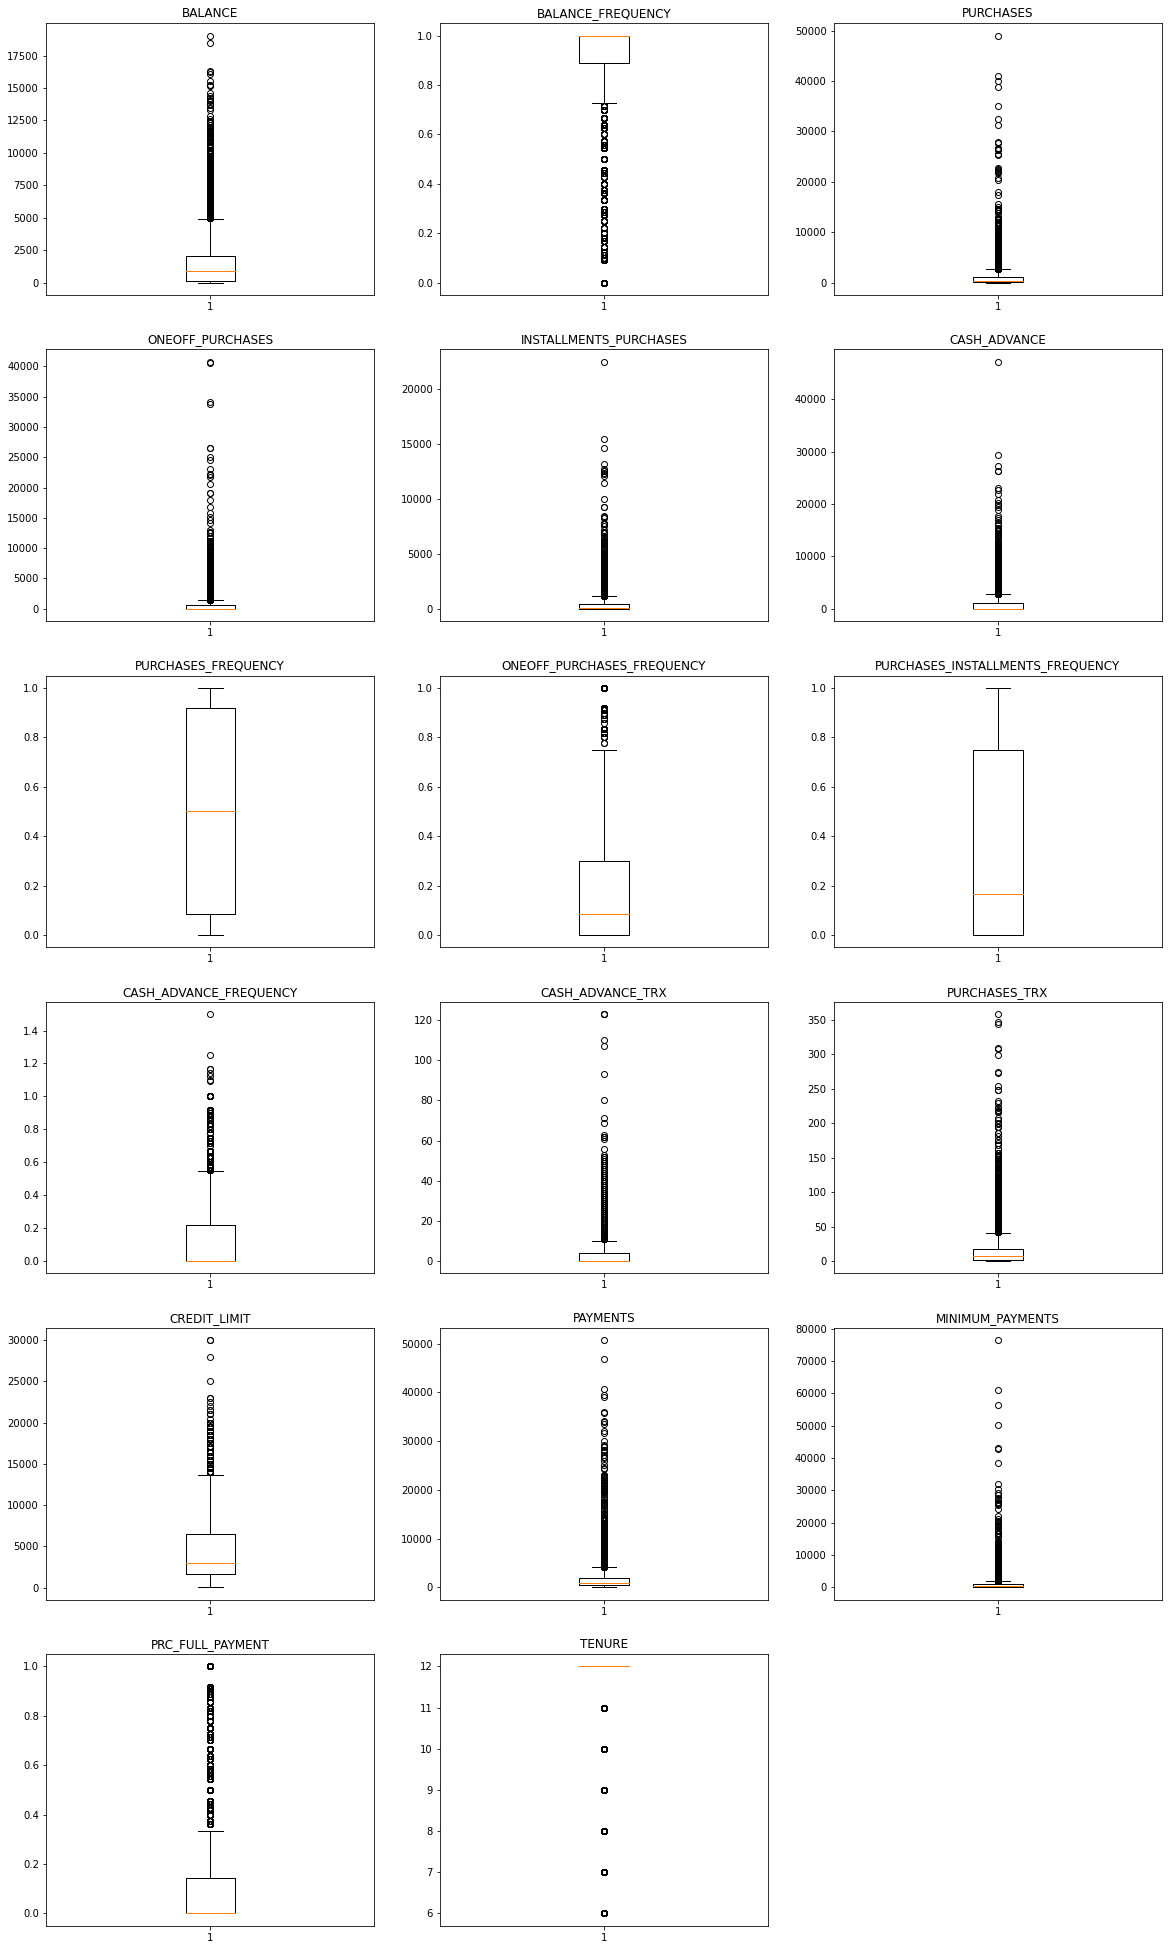

In [21]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

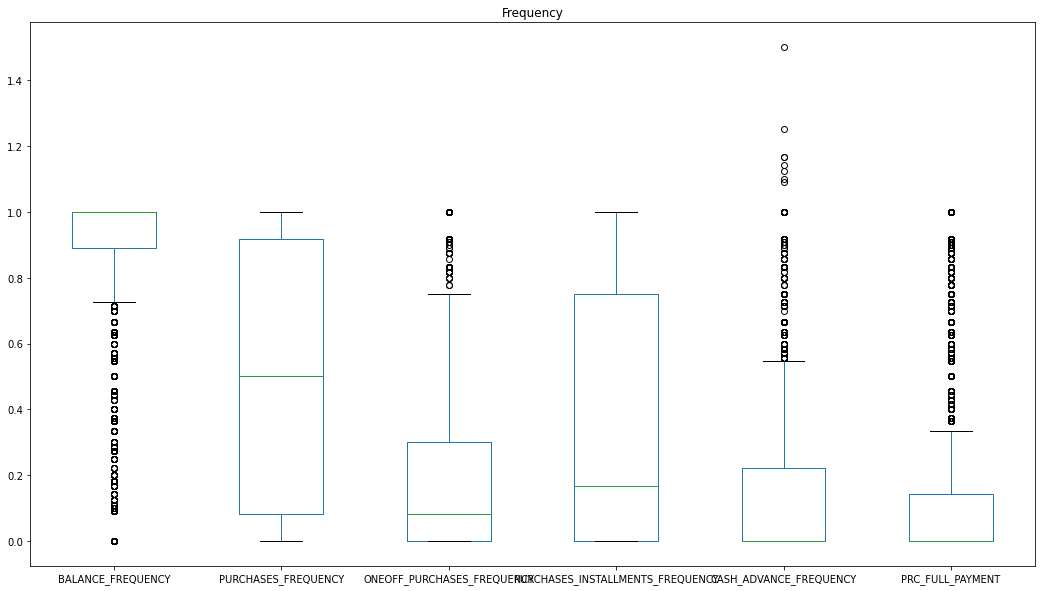

In [22]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.show()


g. Standardize the data using appropriate methods. (2 points)

In [17]:
#Using standard Scalar
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

#### 2. Build a k-means algorithm for clustering credit card data. Kindly follow the below steps and answer the following. (10 points)

a. Build k means model on various k values and plot the inertia against various k values.

In [29]:
def kmeans(cluster):
    kmeans_values=[]
    kmeans = KMeans(n_clusters=cluster, random_state=1).fit_predict(df)
    return kmeans

b. Evaluate the model using Silhouette coefficient

In [30]:
k = [2, 3, 4, 5, 6,7,8,9,10] 
for i in k:
    sil_score = metrics.silhouette_score(df_std,kmeans(i), metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(i, metrics.silhouette_score(df_std, kmeans(i), metric='euclidean')))

Silhouette score for 2 cluster k-means: 0.280
Silhouette score for 3 cluster k-means: 0.205
Silhouette score for 4 cluster k-means: 0.128
Silhouette score for 5 cluster k-means: 0.109
Silhouette score for 6 cluster k-means: 0.099
Silhouette score for 7 cluster k-means: 0.088
Silhouette score for 8 cluster k-means: 0.086
Silhouette score for 9 cluster k-means: 0.074
Silhouette score for 10 cluster k-means: 0.078


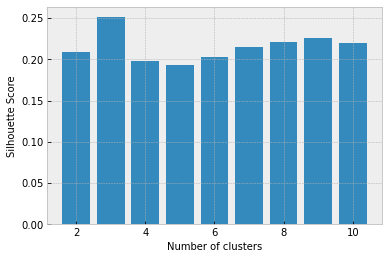

In [31]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

c. Plot an elbow plot to find the optimal value of k

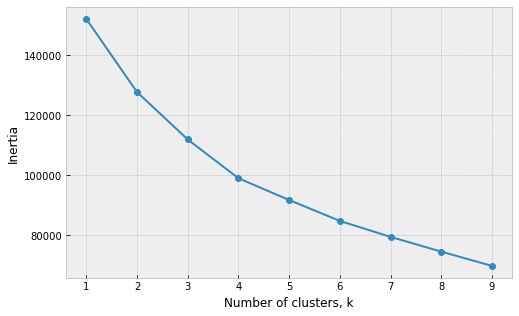

In [32]:
 ks = range(1, 10)
inertias = [] # initializing an empty array

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_std)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

<h5> Elbow is formed at K=4 clusters so this will be the optimum number of clusters

### 3. Apply PCA to the dataset and perform all steps from Q2 on the new features generated using PCA. (15 points)

In [25]:
from sklearn.preprocessing import normalize
# Normalizing the Data 
df_nor = normalize(df_std) 
# View the new feature data's shape 
df_nor.shape 

(8950, 17)

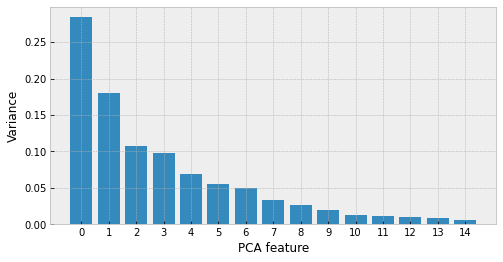

In [26]:
pca = PCA(random_state=123)
pca.fit(df_nor)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15])
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [27]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=1)
    global Df_reduced
    Df_reduced = pca.fit_transform(df_nor)
    print('Shape of the new Data df: ' + str(Df_reduced.shape))

In [28]:
pca_transform(n_comp=1)
def kmeans(cluster):
    kmeans_values=[]
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(Df_reduced)
    return kmeans
k = [2, 3, 4, 5, 6,7,8,9,10] 
for i in k:
    sil_score = metrics.silhouette_score(Df_reduced,kmeans(i), metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(i, metrics.silhouette_score(Df_reduced, kmeans(i), metric='euclidean')))


Shape of the new Data df: (8950, 1)
Silhouette score for 2 cluster k-means: 0.678
Silhouette score for 3 cluster k-means: 0.608
Silhouette score for 4 cluster k-means: 0.585
Silhouette score for 5 cluster k-means: 0.566
Silhouette score for 6 cluster k-means: 0.554
Silhouette score for 7 cluster k-means: 0.554
Silhouette score for 8 cluster k-means: 0.547
Silhouette score for 9 cluster k-means: 0.546
Silhouette score for 10 cluster k-means: 0.544


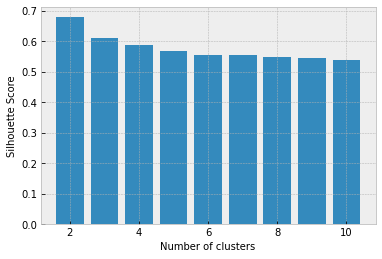

In [33]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(Df_reduced, KMeans(n_clusters = n_cluster).fit_predict(Df_reduced))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

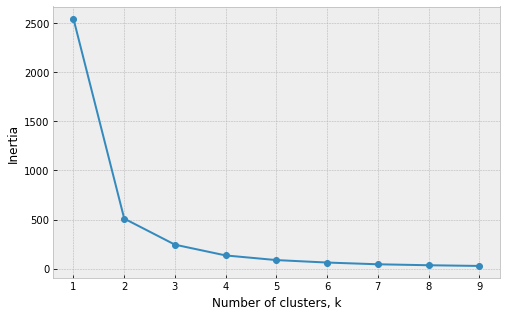

In [34]:
 ks = range(1, 10)
inertias = [] # initializing an empty array

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Df_reduced)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Optimum Value of K from the graph is K=2 (Elbow formed )

### 4. Create a new column as a cluster label in the original data frame and perform cluster analysis. Check the correlation of cluster labels with various features and mention your inferences. (Hint - Does cluster 1 have a high credit limit?) (5 points)

In [37]:
kmeans_       = KMeans(n_clusters=4, random_state=20).fit(df_std)

df['cluster'] = kmeans_.labels_

In [58]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,2


Text(0.5, 1.0, 'Correlation Matrix')

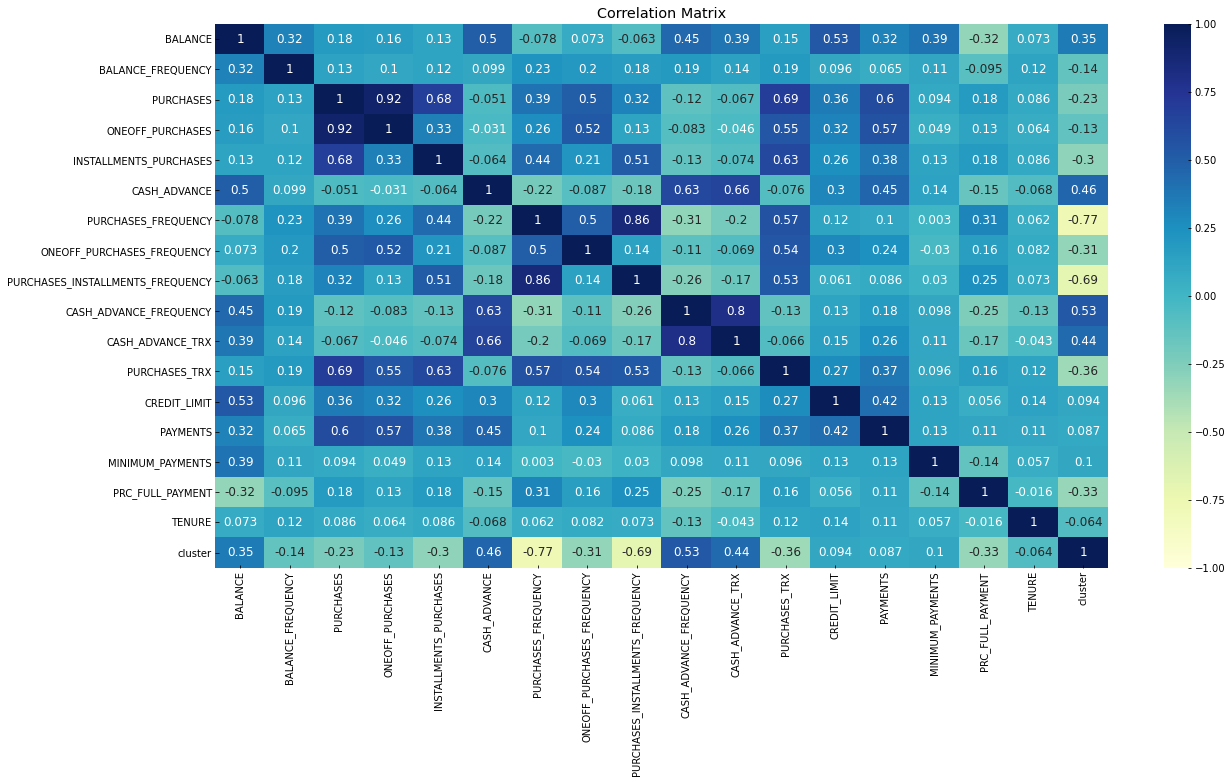

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

plt.title('Correlation Matrix')

In [66]:
#Cluster Analysis
df.groupby(by=['cluster']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


From the above table we can see:-<br>
Cluster 0 : Low balance | Medium Purchase | Medium PURCHASES_TRX | Low CreditLimit<br>
Cluster 1 : High balance | High Purchase | High PURCHASES_TRX |High CreditLimit<br>
Cluster 2 : Medium balance | Low Purchase | Low PURCHASES_TRX |Low CreditLimit<br>
Cluster 3 : High balance | Low Purchase | Low PURCHASES_TRX |High CreditLimit<br>

###   5. Comment your findings and inferences and compare the performance. Does applying PCA give a better result in comparison to earlier?

#Comparing performance before and after PCA<br>
_From the outputs above:_<br>
Silhouette score for 4 cluster k-means: 0.128<br>
Silhouette score for 4 cluster k-means after PCA: 0.585

<h5>We can clearly see that after PCA was applied the silhouette score increased considerably. A higher silhouette score essentially means that the clusters formed are dense and easily seperable which is good for our model. Hence , we see that PCA has drastically improved our Kmeans model.



## Inferences :- <br>
    --> Cluster 0 : Low balance | Medium Purchase | Medium PURCHASES_TRX | Low CreditLimit<br>
    Cluster 1 : High balance | High Purchase | High PURCHASES_TRX |High CreditLimit<br>
    Cluster 2 : Medium balance | Low Purchase | Low PURCHASES_TRX |Low CreditLimit<br>
    Cluster 3 : High balance | Low Purchase | Low PURCHASES_TRX |High CreditLimit<br>
    
<b>Cluster 0<b> customers are typically young adults (20-30yrs) with a low account balance but a medium purchase amount<br>
<b>Cluster 1<b> customers are typically the rich people with a high account balance and an equally high purchase amount<br>
<b>Cluster 2<b> customers are typically the lower middle class crowd with a medium account balance but a low purchase amount(which means they are cautious about their spending <br>
<b>Cluster 3<b> customers are typically the upper middle class crowd with a high account balance but a low-medium purchase amount(again this means since they are middle class they are considerate about their spending habits as compared to the rich people<br>

